[*********************100%***********************]  1 of 1 completed


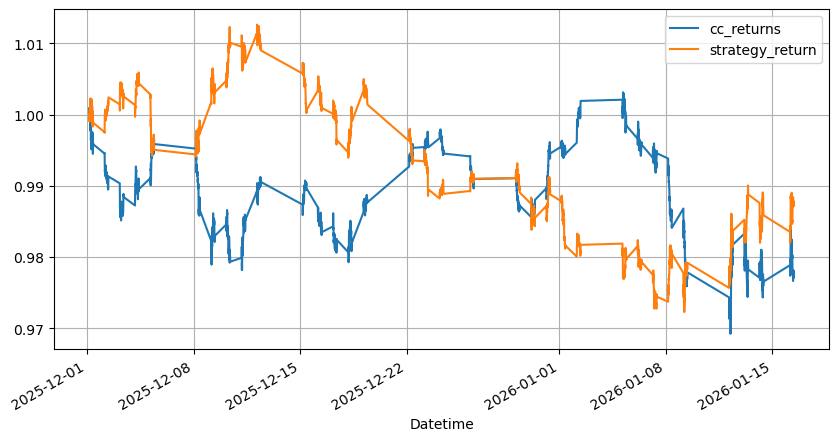

Buy and hold returns: 0.9777
strategy returns: 0.9872


,Open,Close,Adj Close,cc_returns,sma,position,strategy_return
Datetime,,,,,,,
2026-01-16 09:10:00+00:00,25704.949219,25710.849609,25710.849609,1.000204,25693.462402,1.0,1.000204
2026-01-16 09:15:00+00:00,25710.199219,25703.349609,25703.349609,0.999708,25693.187337,1.0,0.999708
2026-01-16 09:20:00+00:00,25703.400391,25697.550781,25697.550781,0.999774,25694.129069,1.0,0.999774
2026-01-16 09:25:00+00:00,25696.150391,25707.199219,25707.199219,1.000375,25696.037272,1.0,1.000375
2026-01-16 09:30:00+00:00,25706.349609,25697.250000,25697.250000,0.999613,25697.420573,1.0,0.999613
2026-01-16 09:35:00+00:00,25697.300781,25694.199219,25694.199219,0.999881,25699.303874,-1.0,1.000119
2026-01-16 09:40:00+00:00,25694.199219,25683.099609,25683.099609,0.999568,25698.874674,-1.0,1.000432
2026-01-16 09:45:00+00:00,25682.449219,25695.550781,25695.550781,1.000485,25699.453939,-1.0,0.999515
2026-01-16 09:50:00+00:00,25694.050781,25699.550781,25699.550781,1.000156,25699.504069,-1.0,0.999844


In [1]:
# Importing all required libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

# Selecting the timeperiod range for which the analysis will be done
end1 = datetime.datetime.today().date()  # Selecting today's date
start1 = end1 - pd.Timedelta(days=50)  # Selecting date from which analysis will start

# Importing data via yfinance library
df = yf.download('^NSEI', start=start1, end=end1, interval='5m', auto_adjust=False,multi_level_index=False)

df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]  # Arranging columns
df = df.drop(['High', 'Low', 'Volume'], axis=1)  # Dropping unnecessary columns
            
df['cc_returns'] = df['Close'].pct_change()  # Percentage change from previous to current price

# Create SMA column with 12 period window
sma = 12 
df['sma'] = df['Close'].rolling(window=sma).mean() 

# Create position column - LONG-SHORT strategy
# +1 = Long (buy) when Close > SMA
# -1 = Short (sell) when Close < SMA
df['position'] = np.where(df['Close'] > df['sma'], 1,-1)
df['position'] = df['position'].shift(1)

#df['position'].value_counts()[If you want to count how many time trades have been generated]

df['strategy_return']=df['position']*df['cc_returns'] #Creating column to know strategy return over backtesting period

df['strategy_return']=1+df['strategy_return'] #as calculating simple return we are doing+1 in every return just basic simple return calculation
df['cc_returns']=1+df['cc_returns']

df[['cc_returns','strategy_return']].cumprod().plot(grid=True,figsize=(10,5))
plt.show()

#Comparing startegy return with only buy and hold strategy
print('Buy and hold returns:',np.round(df['cc_returns'].cumprod()[-1],4)) 
print('strategy returns:',np.round(df['strategy_return'].cumprod()[-1],4))

df.tail(10)